# Using KNN and Naive Bayes Classifiers To Predict Iphone Sale

## Short Overview of the Dataset 

I have used a dataset which consists of Gender, age, Salary and Purchase Iphone as the attributes.

Here, Gender is irrelevant to outcome or class so we will remove such attribute. Each row will contain age of person, salary of person and column for our class that is "Purchase Iphone"  to indicate whether our user will buy an Iphone or not.

Independent attributes consists of Gender, Age and Salary and the dependent attribute is Purchase Iphone. We will be predicting the possibility of a given person with Age and Salary and check whether the person will buy Iphone or not , we will take training and test models for checking the accuracy of our prediction. We will be using KNN as well as Naive Bayes regression models for our prediction which will be implemented form scratch using Python.

## Dataset

In [19]:
import pandas as pd
dataset = pd.read_csv('iphone_purchase_records.csv')
dataset

#Here is our dataset:

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Importing required libraries that we will use to make our work easier 

In [21]:
import numpy as np                                   #for managing our arrays 
import seaborn as sns                                # required for bar graphs
import matplotlib.pyplot as plt                      #for checking our results graphically

from sklearn.metrics import accuracy_score            #for checking accuracy of our results
from sklearn.model_selection import train_test_split   #for training and testing our results

from scipy.stats import mode                          #for calculating the mode

### Dropping the Gender attribute from our dataframe because our class value doesn't depend on it.

In [22]:
dataset.drop('Gender', axis=1, inplace=True)

In [23]:
dataset.head()      

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### In X we store all the attributes for training our model 
### In y we will store the class attribute values to check our accuracy with our predicted values

In [5]:
X = dataset.drop('Purchase Iphone', axis=1)
y = dataset['Purchase Iphone']

In [6]:
print(X)
print(y)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


### Calculating the Distances

Created a function for calculating distances from the required datapoint to datapoints of dataset
using simple formula, 
                     

In [8]:
def euclidean_distance(pt1,pt2):
    distance=np.sqrt(np.sum((pt1-pt2)**2))
    return distance

a = np.array([3,4])
b = np.array([5,9])

print(euclidean_distance(a,b))

5.385164807134504


### Calculating 

In [9]:
def KNN(X_train,X_test,y_train,y_test,k_val):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))
        
        distance_data = pd.DataFrame(data=distances, columns=['distance'], index = y_train.index)
        
        k_neighbours_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]
        
        labels = y_train.loc[k_neighbours_list.index]
        
        voting = mode(labels,keepdims=True).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=5)

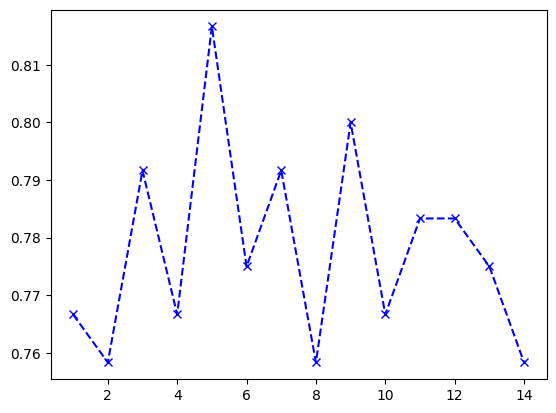

In [11]:
accuracy_vals = []
for i in range(1,15):
    y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=i)
    accuracy_vals.append(accuracy_score(y_test,y_hat_test))
plt.plot(range(1,15), accuracy_vals, color='blue', linestyle= 'dashed', marker='x')

0.8166666666666667


Text(0.5, 1.0, 'KNN Results')

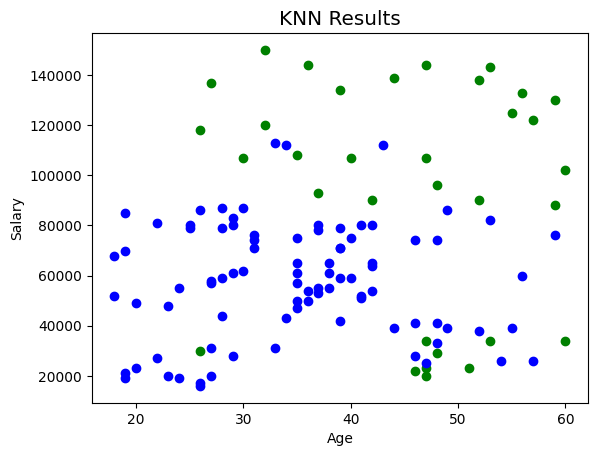

In [12]:
y_hat_test = KNN(X_train, X_test, y_train, y_test, k_val=5)
print(accuracy_score(y_test,y_hat_test))

for i in range(len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color = 'blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color = 'green')

plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Results')

<AxesSubplot: xlabel='Age', ylabel='Salary'>

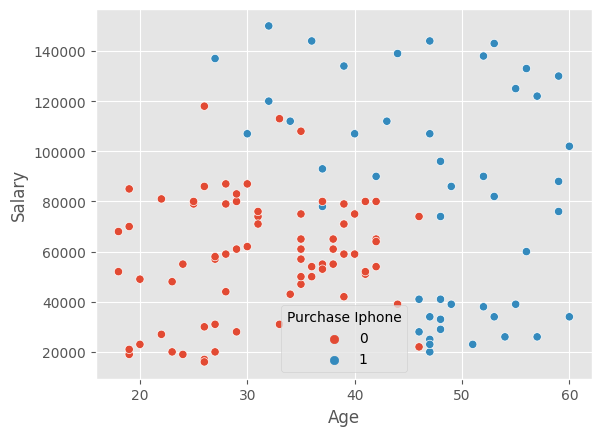

In [14]:
sns.scatterplot(data=dataset, x = X_test['Age'], y = X_test['Salary'], hue= 'Purchase Iphone')